In [6]:
import numpy as np
import matplotlib.pyplot as plt

#set parameters
DT = 0.05
DX = 1
por = 0.3
Cf = 100.0
Cb = 0.0
DH = 2.5
q = 1.5

L = 50
Tmax = 5
N = int(L / DX) + 1

node_locations = np.arange(0, L + DX, DX)
number_timesteps = int(Tmax / DT)
time_increments = np.arange(DT, Tmax + DT, DT)
Cnew = np.zeros([N,number_timesteps])

#set coefficients in in FD equations
p = (DH * DT) / (por * DX**2)
r = (q * DT) / (2 * por * DX)

a = p - r
b = 2 * por + 2 * p
c = p + r


for i in range(number_timesteps):
    Cnew[0,i] = Cf  # Boundary condition on the left
    Cnew[50,i] = Cb  # Boundary condition on the right
    
    D = np.zeros(N + 1)
    E = np.zeros(N + 1)
    F = np.zeros(N + 1)

    for k in range(1, N-1):
        if k == 1:
            D[k] = a * Cnew[k+1,i-1] + (4 * por - b) * Cnew[k,i-1] + c * Cnew[k-1,i-1]
            E[k] = a / b
            F[k] = (D[k] + c * Cnew[k - 1,i-1]) / b
        else:
            D[k] = a * Cnew[k+1,i-1] + (4 * por - b) * Cnew[k,i-1] + c * Cnew[k-1,i-1]
            E[k] = a / (b - c * E[k-1])
            F[k]= (D[k] + c * F[k-1]) / (b - c * E[k-1])
    
    for k in range(N - 2, 0, -1):
        Cnew[k,i] = F[k] + E[k] * Cnew[k+1,i]

[[1.00000000e+02 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  1.00000000e+02 1.00000000e+02]
 [0.00000000e+00 8.25076420e+01 8.30136069e+01 ... 9.99999990e+01
  9.99999992e+01 9.99999993e+01]
 [0.00000000e+00 3.40375549e+01 6.84925696e+01 ... 9.99999974e+01
  9.99999977e+01 9.99999980e+01]
 ...
 [0.00000000e+00 6.91270627e-17 3.33609063e-15 ... 7.02800727e+01
  7.03563428e+01 7.04249175e+01]
 [0.00000000e+00 2.61235993e-17 1.28260284e-15 ... 4.56625145e+01
  4.57140500e+01 4.57603984e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


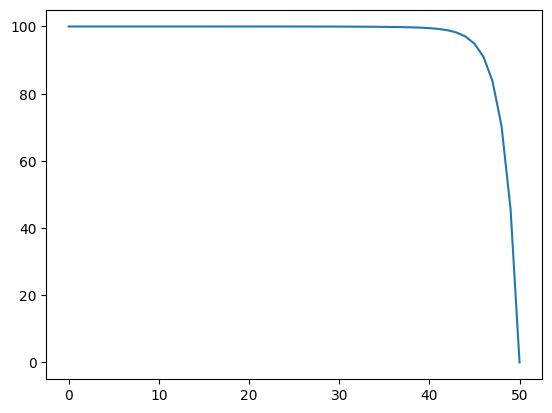

In [10]:
plt.plot(Cnew)
plt.show()